In [5]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

df = pd.read_csv("/Users/ryansteele/my_repo2/data/matchups/matchups_all_seasons.csv")

# Target
y = df['point_diff']

# Start from numeric features only
X_num = df.drop(columns=['point_diff']).select_dtypes(include='number')

# 1) Drop columns that are mostly NaN (e.g. > 40% missing)
missing_frac = X_num.isna().mean()
keep_cols = missing_frac[missing_frac < 0.4].index
X_num = X_num[keep_cols]

# 2) Fill remaining NaNs (median per column is a safe choice)
X_num = X_num.fillna(X_num.median())

# 3) Compute mutual information
mi = mutual_info_regression(X_num, y, random_state=34)
mi_series = pd.Series(mi, index=X_num.columns)

# 4) Show the top and bottom features
print("Top 20 features by mutual information with point_diff:")
print(mi_series.sort_values(ascending=False).head(20))

print("\nBottom 20 features (almost no signal):")
print(mi_series.sort_values(ascending=True).head(20))


Top 20 features by mutual information with point_diff:
opp_point_diff               3.864423
win                          0.687976
opp_win                      0.684437
opp_points_against           0.487443
points_for                   0.486058
opp_points_for               0.474539
points_against               0.468546
opp_totalscore               0.395378
totalscore                   0.390219
opp_scorequarter4            0.171301
opp_opponentscorequarter4    0.157907
opponentscorequarter4        0.149796
opp_opponentscorequarter2    0.144565
scorequarter2                0.141394
scorequarter4                0.140447
opponentscorequarter3        0.128672
vegas_spread                 0.125716
opp_scorequarter3            0.105500
home_implied_prob            0.099078
opp_teamid                   0.091063
dtype: float64

Bottom 20 features (almost no signal):
gamekey                                  0.0
opp_week                                 0.0
strength_sum_rolling_yards_allowed_3    

In [18]:
import sys
from pathlib import Path

# Adjust this if your notebook sits somewhere else
PROJECT_ROOT = Path("/Users/ryansteele/my_repo2")
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from my_project3.modeling.predict import build_future_matchups, default_model_path, load_model_and_features

season, week = 2025, 13
df_future = build_future_matchups(season, week)

# Peek at key drivers for each game
cols_to_inspect = [
    "home_team", "away_team",
    "home_moneyline", "away_moneyline",
    "home_implied_prob", "vegas_spread",
    "home_elo_pre", "away_elo_pre", "diff_elo_pre",
]

print(df_future[cols_to_inspect].to_string(index=False))

2025-11-29 18:13:34.688 | INFO     | my_project3.modeling.predict:load_schedule:165 - Loading schedule from cache: /Users/ryansteele/my_repo2/data/raw/schedules/scoresbyweek_2025REG_13.csv
2025-11-29 18:13:34.730 | INFO     | my_project3.modeling.predict:build_future_matchups:210 - Building future matchups for 16 games...
2025-11-29 18:13:34.766 | WARNING  | my_project3.modeling.predict:get_features_for_future_week:189 - No features for MIA week 13 in /Users/ryansteele/my_repo2/data/features/2025/MIA_2025_features.csv; falling back to week 12
2025-11-29 18:13:34.787 | WARNING  | my_project3.modeling.predict:get_features_for_future_week:189 - No features for LAC week 13 in /Users/ryansteele/my_repo2/data/features/2025/LAC_2025_features.csv; falling back to week 12
2025-11-29 18:13:34.797 | WARNING  | my_project3.modeling.predict:get_features_for_future_week:189 - No features for WAS week 13 in /Users/ryansteele/my_repo2/data/features/2025/WAS_2025_features.csv; falling back to week 12
2

Feature count after filtering: 309


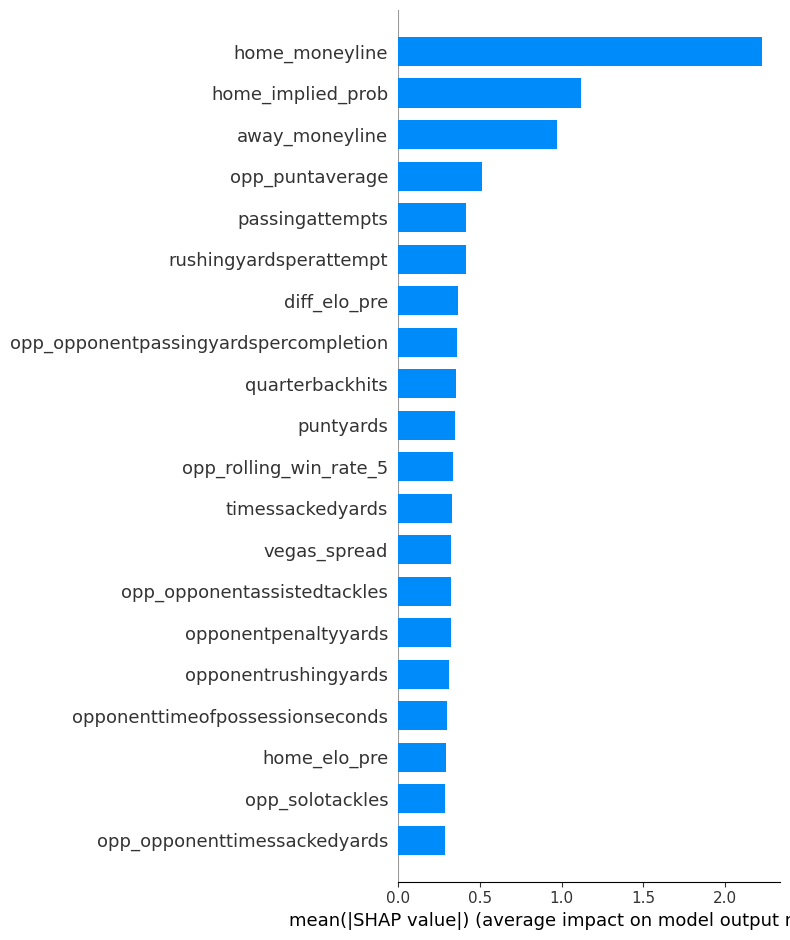

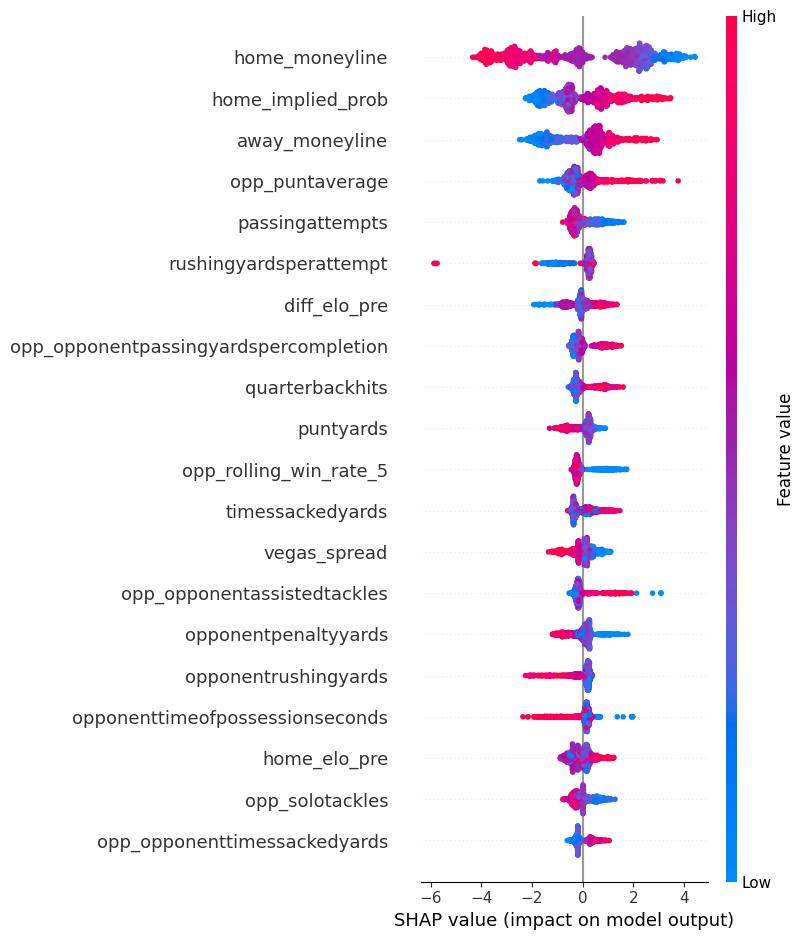

home_moneyline                           2.223454
home_implied_prob                        1.118218
away_moneyline                           0.969747
opp_puntaverage                          0.511455
passingattempts                          0.417937
rushingyardsperattempt                   0.416549
diff_elo_pre                             0.367304
opp_opponentpassingyardspercompletion    0.359000
quarterbackhits                          0.354003
puntyards                                0.346152
opp_rolling_win_rate_5                   0.339047
timessackedyards                         0.331747
vegas_spread                             0.324457
opp_opponentassistedtackles              0.323492
opponentpenaltyyards                     0.323481
opponentrushingyards                     0.310652
opponenttimeofpossessionseconds          0.301696
home_elo_pre                             0.291444
opp_solotackles                          0.290183
opp_opponenttimessackedyards             0.290144


In [13]:
FORBIDDEN = {
    "gamekey",
    "date",
    "seasontype",
    "season",
    "week",
    "team",
    "opponent",
    "home_away",
    "stadium",
    "teamgameid",
    "dayofweek",
    "teamid",
    "opponentid",
    "scoreid",
    "win",
    "home",
    "point_diff",
    "points_for", 
    "points_against", 
    "timeofpossession",
    "totalscore",
    "opponenttimeofpossession",
    "scorequarter1",
    "scorequarter2",
    "scorequarter3",
    "scorequarter4",
    "scoreovertime",
    "opponentscorequarter1",
    "opponentscorequarter2",
    "opponentscorequarter3",
    "opponentscorequarter4",
    "opponentscoreovertime",
    "opp_gamekey",
    "opp_date",
    "opp_seasontype",
    "opp_season",
    "opp_week",
    "opp_team",
    "opp_opponent",
    "opp_home_away",
    "opp_stadium",
    "opp_teamgameid",
    "opp_dayofweek",
    "opp_teamid",
    "opp_opponentid",
    "opp_scoreid",
    "opp_win",
    "opp_home",
    "opp_point_diff",
    "opp_points_for", 
    "opp_points_against", 
    "opp_timeofpossession",
    "opp_totalscore",
    "opp_opponenttimeofpossession",
    "opp_scorequarter1",
    "opp_scorequarter2",
    "opp_scorequarter3",
    "opp_scorequarter4",
    "opp_scoreovertime",
    "opp_opponentscorequarter1",
    "opp_opponentscorequarter2",
    "opp_opponentscorequarter3",
    "opp_opponentscorequarter4",
    "opp_opponentscoreovertime",
    "next_game_win"
    
    # add anything else you know is post-game or leakage
}

import pandas as pd
import numpy as np

df = pd.read_csv("/Users/ryansteele/my_repo2/data/matchups/matchups_all_seasons.csv")

target_col = "point_diff"
y = df[target_col]

# start from numeric columns
X_all = df.drop(columns=[target_col]).select_dtypes(include="number")

# drop forbidden columns
X = X_all[[c for c in X_all.columns if c not in FORBIDDEN]]

# optional: drop very-missing columns and fill NaNs
missing_frac = X.isna().mean()
X = X.loc[:, missing_frac < 0.4]
X = X.fillna(X.median())

print("Feature count after filtering:", X.shape[1])

import xgboost as xgb
import shap

model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=34,
)

model.fit(X, y)

explainer = shap.TreeExplainer(model)
X_sample = X.sample(n=min(1000, len(X)), random_state=34)
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, plot_type="bar")
shap.summary_plot(shap_values, X_sample)

# Mean absolute SHAP value per feature
importances = np.abs(shap_values).mean(axis=0)
shap_importance = pd.Series(importances, index=X_sample.columns)

shap_importance_clean = shap_importance[~shap_importance.index.isin(FORBIDDEN)]
print(shap_importance_clean.sort_values(ascending=False).head(30))

